# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przyk�?adowe problemy testowe

In [ ]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [ ]:
# Rastrigin function (minimum at 0) 
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [ ]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [ ]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [ ]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [ ]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

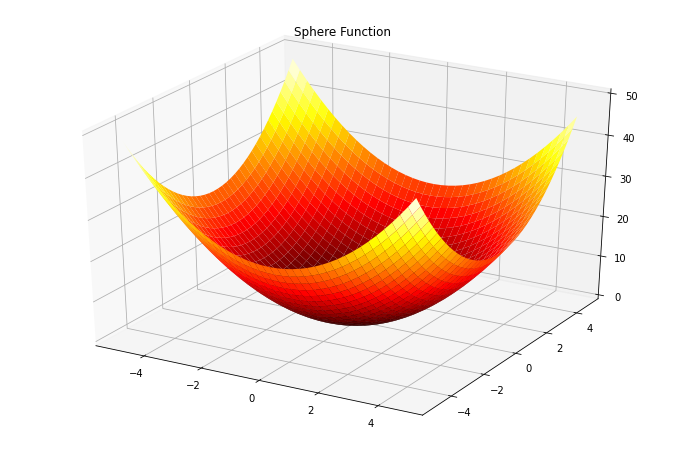

In [ ]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

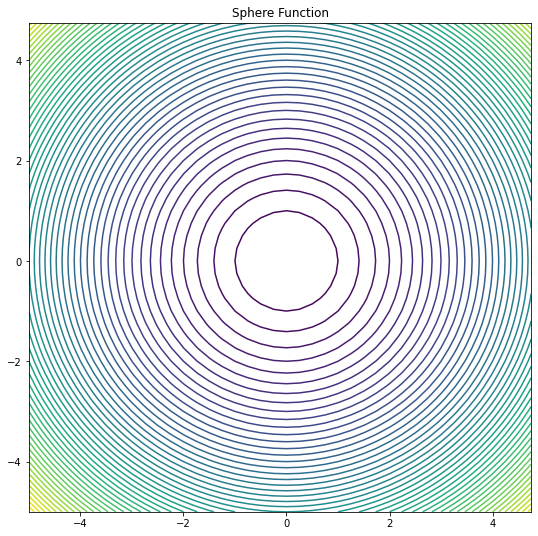

In [ ]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

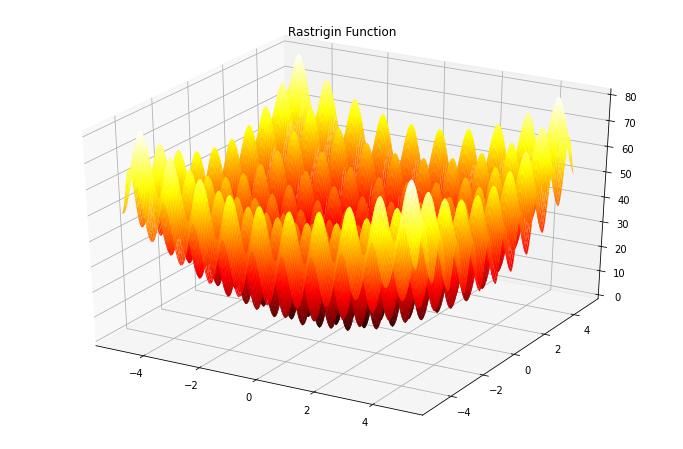

In [ ]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

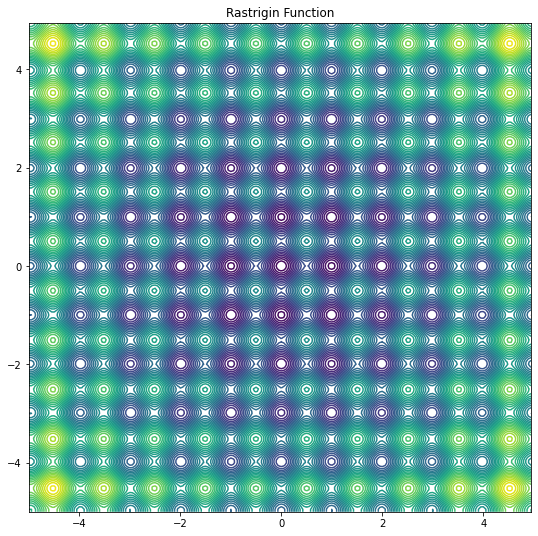

In [ ]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

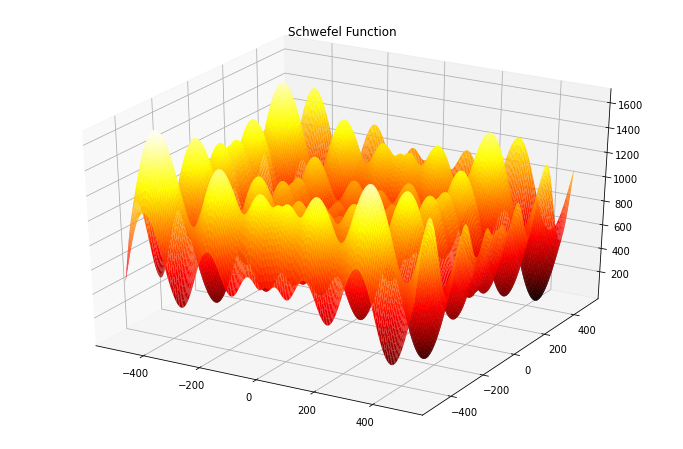

In [ ]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

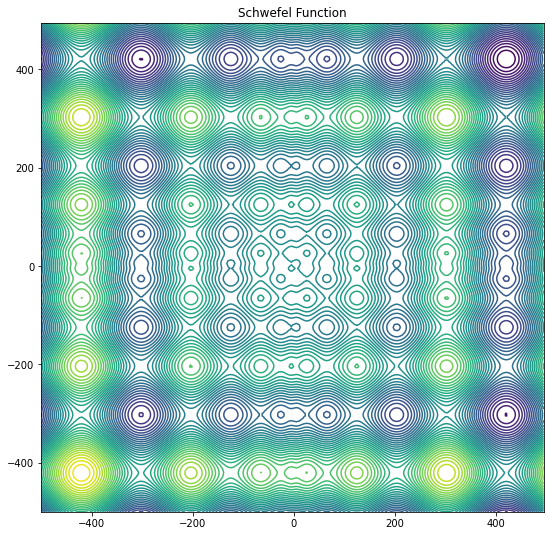

In [ ]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

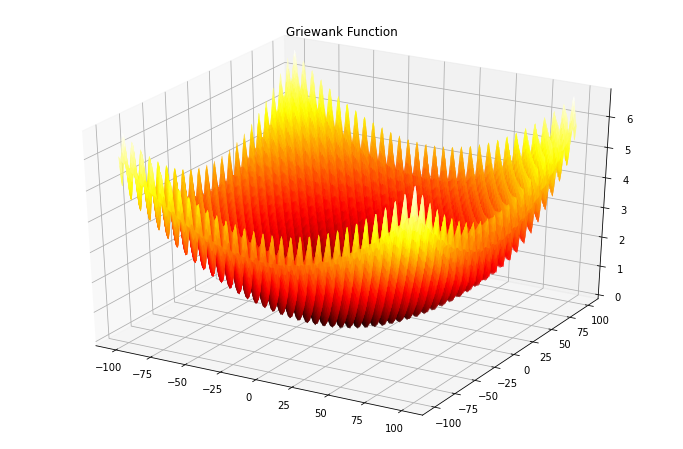

In [ ]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

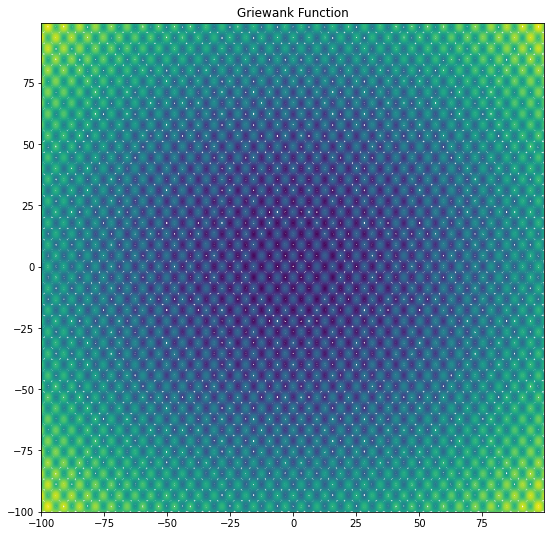

In [ ]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przyk�?adowe modele mutacji

In [ ]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przyk�?ad 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozk�?ad normalny $\mathcal{N}(0, \sigma^2)$, za�? $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [ ]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

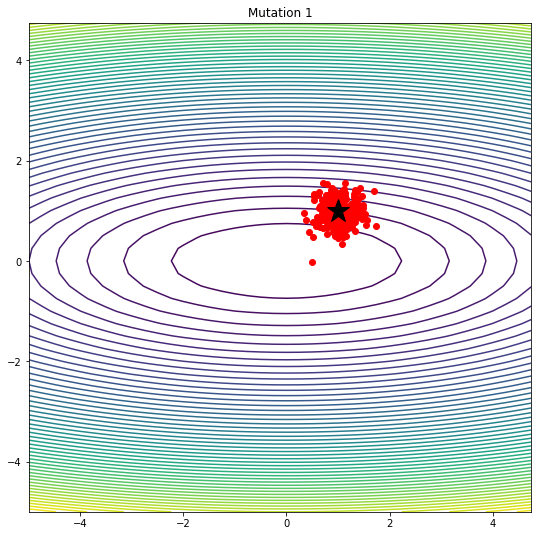

In [ ]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przyk�?ad 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozk�?ad normalny $\mathcal{N}(0, \sigma_i^2)$, za�? $\sigma_i$ moşe by�? róşna dla róşnych $i = 1, 2, \ldots, d$

In [ ]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

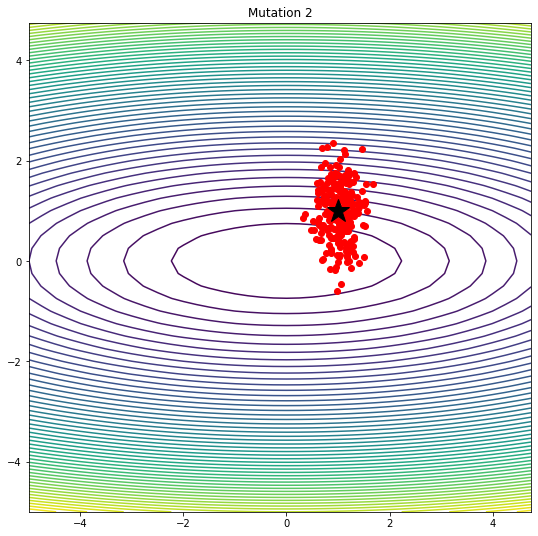

In [ ]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przyk�?ad 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozk�?ad normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [ ]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

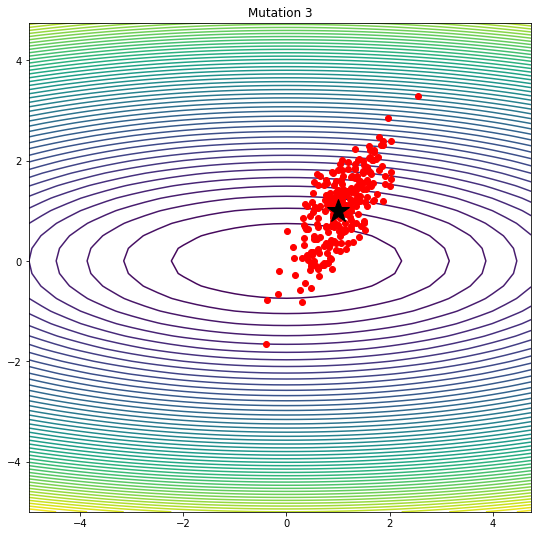

In [ ]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przyk�?adowa strategia ewolucyjna

In [246]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1, mutation = None):
    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00
    iter = 3000
    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)


        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        if mutation == None:
            # mutating the children population by adding random gaussian noise
            children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        elif mutation == first_mutation_ES:
            children_population_solutions = mutation(children_population_solutions)
        elif mutation == second_mutation_ES:
            children_population_solutions = mutation(children_population_sigmas, children_population_solutions)
        elif mutation == third_mutation_ES:
            children_population_solutions = mutation(children_population_sigmas, children_population_solutions)
        elif mutation == tran_mutation:
            children_population_solutions = mutation(children_population_solutions)



        if objective_function == objective_function_F7:
            for index_x, x in enumerate(children_population_solutions):
                for index_i, i in enumerate(x):
                    if i > 500:
                        children_population_solutions[index_x][index_i] = np.random.randint(450, 500)
                    if i < - 500:
                        children_population_solutions[index_x][index_i] = np.random.randint(-500, -450)


  
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
         

        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]
      
        if np.abs(log_objective_values[:t+1, 1].max()) < 0.001:
            return (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2])

        if np.mod(t, 100) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]

### Dzia�?anie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -5947.52919501, mean score = -26404.73681432.
Iteration 0010 : best score = -40.22571395, mean score = -231.12579292.
Iteration 0020 : best score = -0.06916746, mean score = -0.58264861.
Iteration 0030 : best score = -0.00013973, mean score = -0.00128994.
Iteration 0040 : best score = -0.00000027, mean score = -0.00000231.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


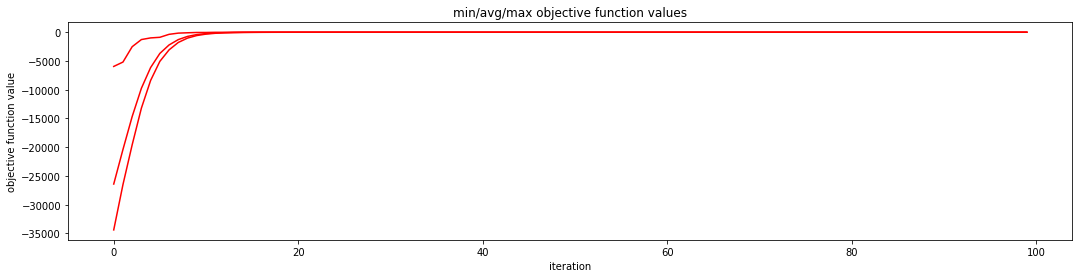

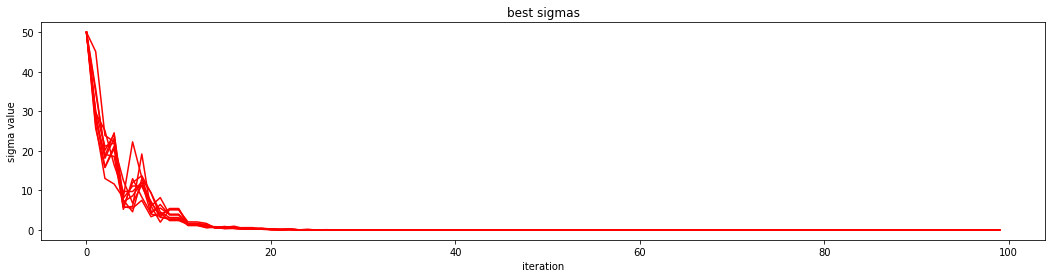

In [ ]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Dzia�?anie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -5310.88976197, mean score = -26529.70639620.
Iteration 0010 : best score = -120.58627339, mean score = -325.69234950.
Iteration 0020 : best score = -31.59735578, mean score = -75.67309684.
Iteration 0030 : best score = -17.78094327, mean score = -61.70771804.
Iteration 0040 : best score = -17.78094327, mean score = -55.88442706.
Iteration 0050 : best score = -17.78094327, mean score = -51.88033516.
Iteration 0060 : best score = -8.24886644, mean score = -46.30451955.
Iteration 0070 : best score = -0.06851500, mean score = -0.40034218.
Iteration 0080 : best score = -0.00017269, mean score = -0.00106675.
Iteration 0090 : best score = -0.00000048, mean score = -0.00000282.


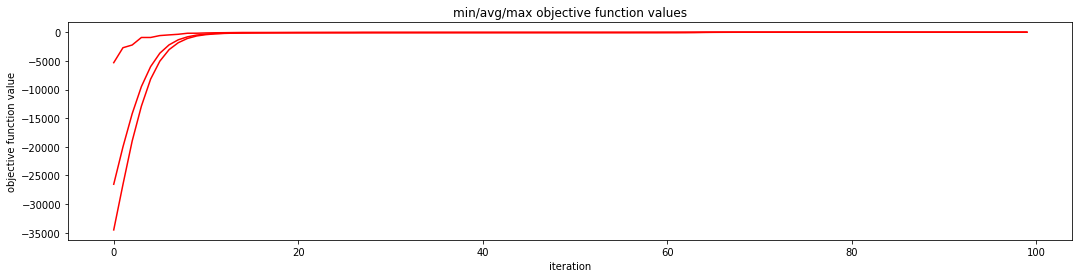

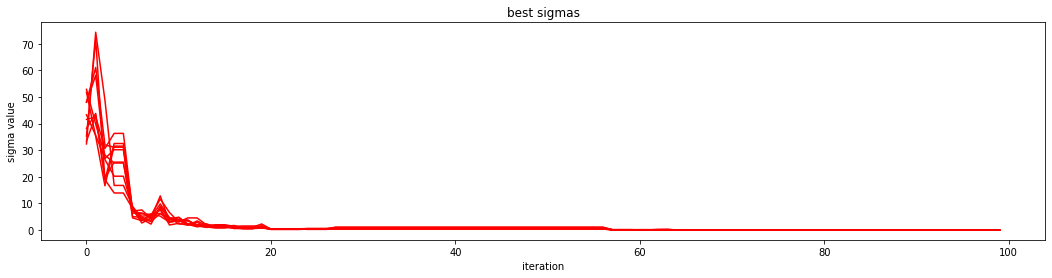

In [ ]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Dzia�?anie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.36860181, mean score = -7.53798060.
Iteration 0010 : best score = -0.68830724, mean score = -1.05256333.
Iteration 0020 : best score = -0.16133281, mean score = -0.70529364.
Iteration 0030 : best score = -0.00021695, mean score = -0.00293886.
Iteration 0040 : best score = -0.00000254, mean score = -0.00001208.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000006.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


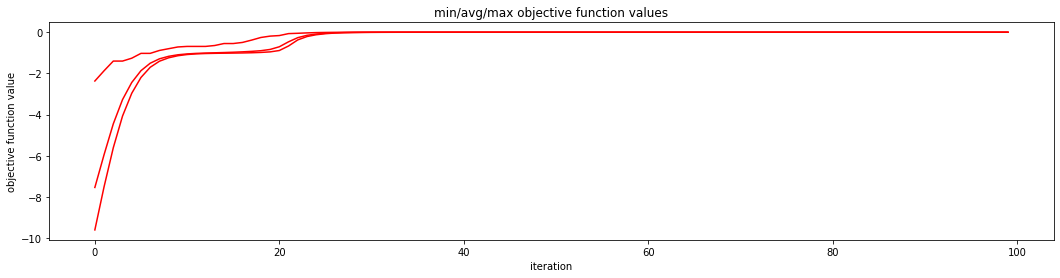

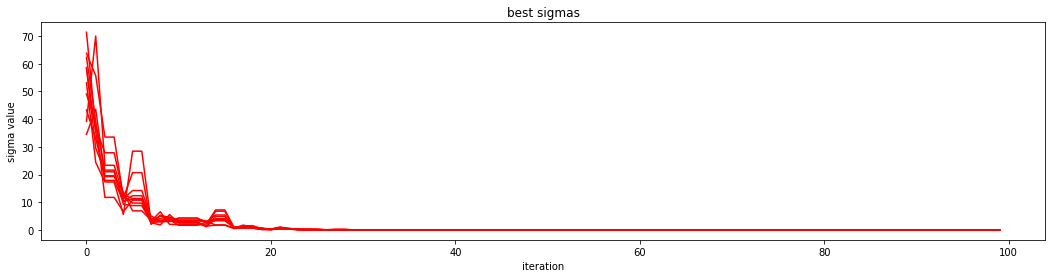

In [ ]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

***Task 1b***


In [195]:
d_small = [10,20]
N_all = 2000
d_big = [50,100]
T_big = 3000
objective_functions = [objective_function_F1, objective_function_F6,objective_function_F8]
objective_functions_names = ["Sphere", "Rastrigin", "Griewank"]

RESULTS_small = {}
RESULTS_small['Sphere'] = []
RESULTS_small['Rastrigin'] = []
RESULTS_small['Griewank'] = []

RESULTS_big = {}
RESULTS_big['Sphere'] = []
RESULTS_big['Rastrigin'] = []
RESULTS_big['Griewank'] = []

for index, fun in enumerate(objective_functions):
    for d in d_small:
        print(objective_functions_names[index])
        print(d)
        RESULTS_small[objective_functions_names[index]].append( es(fun, d, N, 1000, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10))





Sphere
10
Iteration 0000 : best score = -3873.14573555, mean score = -26337.72219603.
Sphere
20
Iteration 0000 : best score = -28355.46853306, mean score = -60574.91990593.
Rastrigin
10
Iteration 0000 : best score = -8252.45704226, mean score = -26867.64764205.
Iteration 0100 : best score = -21.22580897, mean score = -49.30346168.
Iteration 0200 : best score = -19.10650249, mean score = -42.06305023.
Iteration 0300 : best score = -0.18946107, mean score = -0.90835405.
Rastrigin
20
Iteration 0000 : best score = -23828.12313744, mean score = -61279.95943138.
Iteration 0100 : best score = -88.65601387, mean score = -128.61409380.
Iteration 0200 : best score = -1.98991811, mean score = -1.98991811.
Iteration 0300 : best score = -1.98991811, mean score = -1.98991811.
Iteration 0400 : best score = -1.98991811, mean score = -1.98991811.
Iteration 0500 : best score = -1.98991811, mean score = -1.98991811.
Iteration 0600 : best score = -1.98991811, mean score = -1.98991811.
Iteration 0700 : bes

In [198]:
print(RESULTS_small)

{'Sphere': [(40, -0.000941933973878561, -0.005122998943247954), (51, -0.0005994082256527206, -0.0017490766050278664)], 'Rastrigin': [(312, -0.000952100581855575, -0.007800412989227595), (999, -1.989918114186537, -1.989918114186537)], 'Griewank': [(55, -0.0006891409155754813, -0.003257062116415215), (44, -0.000969505418213279, -0.002548836797150275)]}


In [202]:
for index, fun in enumerate(objective_functions):
    for d in d_big:
        print(objective_functions_names[index])
        print(d)
        RESULTS_big[objective_functions_names[index]].append( es(fun, d, N, T_big, 2*N, 2, 50.0,  0.7/np.sqrt(2*d), 0.7/np.sqrt(2*np.sqrt(d)), 10))


Sphere
50
Iteration 0000 : best score = -94077.82962678, mean score = -163204.90527605.
Sphere
100
Iteration 0000 : best score = -241162.83679060, mean score = -331721.86702103.
Iteration 0100 : best score = -2.74978130, mean score = -3.91897903.
Rastrigin
50
Iteration 0000 : best score = -112972.26194226, mean score = -164048.71337091.
Iteration 0100 : best score = -348.11835011, mean score = -420.16101934.
Iteration 0200 : best score = -330.49313708, mean score = -387.73897891.
Iteration 0300 : best score = -288.26668457, mean score = -375.45029280.
Iteration 0400 : best score = -288.26668457, mean score = -368.22977509.
Iteration 0500 : best score = -284.74270680, mean score = -363.19033091.
Iteration 0600 : best score = -284.74270680, mean score = -359.10056772.
Iteration 0700 : best score = -284.74270680, mean score = -356.23459569.
Iteration 0800 : best score = -284.74270680, mean score = -353.50432412.
Iteration 0900 : best score = -284.74270680, mean score = -350.91599774.
Iter

In [254]:
RESULTS_schewel = []
for d in d_small:
    print(d)
    RESULTS_schewel.append(es(objective_function_F7, d, 2000, T_big, 2*2000, 2, 50.0,  0.7/np.sqrt(2*d), 0.7/np.sqrt(2*np.sqrt(d)), 10))


10
Iteration 0000 : best score = -3523.25979769, mean score = -3982.99792153.
20
Iteration 0000 : best score = -7509.30837230, mean score = -8047.72908547.
Iteration 0100 : best score = -4127.26283442, mean score = -5453.97557054.
Iteration 0200 : best score = -3543.07147396, mean score = -5079.88103814.


In [256]:
for d in d_big:
    print(d)
    RESULTS_schewel.append(es(objective_function_F7, d, 2000, T_big, 2*2000, 2, 50.0,  1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10))


50
Iteration 0000 : best score = -19284.43065157, mean score = -20250.81336546.
Iteration 0100 : best score = -14415.55556175, mean score = -16513.55010234.
Iteration 0200 : best score = -13710.18650594, mean score = -16119.96925877.
Iteration 0300 : best score = -13710.18650594, mean score = -15893.26302704.
Iteration 0400 : best score = -13710.18650594, mean score = -15747.63109164.
Iteration 0500 : best score = -13710.18650594, mean score = -15620.60487487.
Iteration 0600 : best score = -13710.18650594, mean score = -15519.27617318.
Iteration 0700 : best score = -13710.18650594, mean score = -15442.05354709.
Iteration 0800 : best score = -13669.20396176, mean score = -15366.32880873.
Iteration 0900 : best score = -13669.20396176, mean score = -15307.75557817.
Iteration 1000 : best score = -13660.19354509, mean score = -15253.36287894.
Iteration 1100 : best score = -13660.19354509, mean score = -15205.59626864.
Iteration 1200 : best score = -13660.19354509, mean score = -15162.989501

KeyboardInterrupt: ignored

**Results : Iter gdzie funkcja celu przyjmuje wartosci mniejsze niz 0.001, najlepsza wartosc, srednia wartosc**


In [257]:
print(RESULTS_small)
print(RESULTS_big)
print(RESULTS_schewel)


{'Sphere': [(40, -0.000941933973878561, -0.005122998943247954), (51, -0.0005994082256527206, -0.0017490766050278664)], 'Rastrigin': [(312, -0.000952100581855575, -0.007800412989227595), (999, -1.989918114186537, -1.989918114186537)], 'Griewank': [(55, -0.0006891409155754813, -0.003257062116415215), (44, -0.000969505418213279, -0.002548836797150275)]}
{'Sphere': [(100, -0.0009735098640190646, -0.0020726175809526993), (148, -0.0009139431132030415, -0.0014434305784162985), (99, -0.0008796683422759643, -0.001845530627087859), (145, -0.0009205428305771018, -0.001536508646281429), (181, -0.0009527263294443753, -0.001233861331784412), (411, -0.0009458520317951843, -0.0011136116943674082), (340, -0.0009314970803431241, -0.001926505174080844), (1037, -0.0008991550060529197, -0.0012907016354593206), (89, -0.0009017108845172197, -0.001611971017060656), (156, -0.0009877170948209772, -0.0013829859768258118)], 'Rastrigin': [(2999, -261.27571642889717, -337.1154732604613), (2999, -1.9899181141864801,

**Task 2 A,B,C**


Każda funkcja ma około 40-50% lepszych osobnikow po mutacji. Oprócz funkcji rastrigina, ponieważ on ma zazwyczaj 0, może 1 osobnika lepszego.


In [203]:
#f1 - sphere, f6 - rastrigin, f7 - schwefel, f8 - griewank
N = 100
d = 2
original_individual = np.ones(d)

objective_functions = [objective_function_F1, objective_function_F6,objective_function_F7,objective_function_F8]
objective_functions_names = ["Sphere", "Rastrigin", "Schwefel", "Griewank"]

for index, fun in enumerate(objective_functions):
    print("Results for {} function".format(objective_functions_names[index]))
    print("")
    for i in range(5):
        first_mutation(fun)
        print("Second mutation : ")
        second_mutation(fun)
        print("Third mutation : ")
        third_mutation(fun)
        print("")

Results for Sphere function

Number of mutants that are better than parent : 47, Objective values of best individual : -1.9904750584456408 , Objective values of parent : -2.0
Second mutation : 
Number of mutants that are better than parent : 21, Objective values of best individual : -0.23381404266659253 , Objective values of parent : -2.0
Third mutation : 
Number of mutants that are better than parent : 55, Objective values of best individual : -0.053796830164043526 , Objective values of parent : -2.0

Number of mutants that are better than parent : 47, Objective values of best individual : -1.9911872577331864 , Objective values of parent : -2.0
Second mutation : 
Number of mutants that are better than parent : 33, Objective values of best individual : -0.23356889752502474 , Objective values of parent : -2.0
Third mutation : 
Number of mutants that are better than parent : 47, Objective values of best individual : -0.004415618363761899 , Objective values of parent : -2.0

Number of mut

image.png

**Rozkładu Cholesky'ego używamy w 3 mutacji. Jest to prosty i mało złożony (obliczeniowo) sposób na samplowanie z wielowymiarowego rozkładu normalnego.** 

***Task 3*** 

In [237]:
# F1a, F1b, F1c

modified_spherical_functions = [objective_function_F1a, objective_function_F1b, objective_function_F1c]
modified_names = ["F1a", 'F1b', 'F1c']
d = 10
N= 2000
T = 100

RESULTS_modified = {}
RESULTS_modified['F1a'] = []
RESULTS_modified['F1b'] = []
RESULTS_modified['F1c'] = []

for index,fun in enumerate(modified_spherical_functions):
    RESULTS_modified[modified_names[index]].append(es(fun, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10))
    print("")

Iteration 0000 : best score = -9.50154153, mean score = -6530.98129997.

Iteration 0000 : best score = -0.30281466, mean score = -194682.94592179.

Iteration 0000 : best score = -0.84302251, mean score = -1749.90160144.



In [238]:
print(RESULTS_modified)

{'F1a': [(99, -0.0028021630465017737, -3.1582826548771714)], 'F1b': [(99, -0.02405923722864847, -51.25169383813952)], 'F1c': [(42, -3.077595919354347e-05, -5.921660626255035)]}


In [249]:
def first_mutation_ES(populations):
    sigma = 0.25
    mutations = populations + sigma * np.random.randn(2*N, d)
    return mutations

#es(objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, mutation=first_mutation_ES )

def second_mutation_ES(population_sigmas, populations):
    mutations = []

    for i in range(2*N):
        mutations.append(populations[i] + population_sigmas[i] * np.random.randn(d))

    mutations = np.array(mutations)
    return np.array(mutations)

def third_mutation_ES(sigmas,populations):
    S = np.cov(sigmas.T)
    mutations = populations + np.dot(np.random.randn(d), np.linalg.cholesky(S).T)
    return mutations

def tran_mutation(populations):
    for index,children in enumerate(populations):
        l = len(children)
        i,j = np.random.randint(0,l), np.random.randint(0,l)
        a,b=children[i], children[j]
        children[i],children[j] = b,a
        populations[index] = children
    return populations

d = 2


print(es(objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, mutation=second_mutation_ES))
print(es(objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, mutation=first_mutation_ES))
print(es(objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, mutation=tran_mutation))
print(es(objective_function_F1a, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, mutation=third_mutation_ES))

Iteration 0000 : best score = -0.71305087, mean score = -7620.03141720.
(13, -0.00015715104701574708, -0.17683846075991186)
Iteration 0000 : best score = -60.17633747, mean score = -6367.49764743.
(27, -0.0006608257879115445, -0.29002386626943066)
Iteration 0000 : best score = -23.69890727, mean score = -6869.58457896.
(99, -8.764933236370087, -8.764933236370085)
Iteration 0000 : best score = -39.99340717, mean score = -18730.77090274.
(99, -1.102015475959422, -376.4005927533792)


Wyniki w formacie : Ktora iteracja pozwala dostac wynik lepszy niz 0.001 (99 jezeli wszystkie 100 iteracji zostalo zrobione). Najlepszy score, i mean score populacji.